In [1]:
import pandas as pd
cut_labels_5 = ['NoUse', 'SingleUse', 'LightUse', 'ModerateUse', 'HeavyUse', 'ExtraHeavy']
cut_bins = [-1, 0, 1, 3, 7, 10, 35]

In [ ]:
cohort= ['Moderate Use', 'Light Use','Recovery','Light Use', 'Moderate Use', 'Light Use', 'Moderate Use', 'Recovery', 'Recovery' ]
cohort_dict= dict(zip(df.campaign_name.unique().tolist(), cohort))

In [ ]:
ef= pd.read_csv('/content/wash-spin-win-entrants.csv')

In [ ]:
ef['cohort']= ef.campaign_name.map(cohort_dict)

In [ ]:
ef.groupby('cohort')['email'].agg('nunique')

cohort
Light Use       326
Moderate Use    486
Recovery        198
Name: email, dtype: int64

In [ ]:
df=pd.read_csv('/content/DFORE100.csv')

In [ ]:
df.columns=['campaign_name', 'user_id', 'vends', 'vendAmt']

In [ ]:
df.vends.describe()

count    599.000000
mean       7.165275
std        5.236966
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       32.000000
Name: vends, dtype: float64

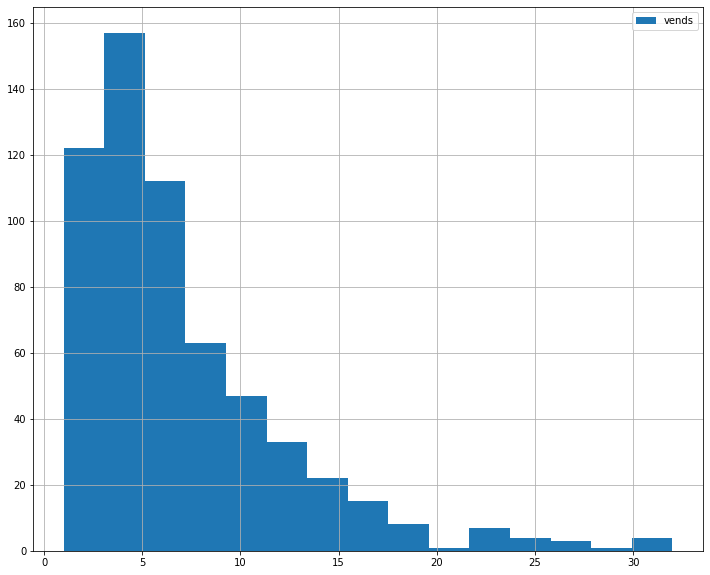

In [ ]:
df.vends.hist(figsize=(12,10), bins=15, legend=True)

In [ ]:
cut_labels_5 = ['Single Use', 'Light Use', 'Moderate Use', 'Heavy Use', 'Extra Heavy']
cut_bins = [0, 1, 3, 7, 10, 35]
df['useBucket'] = pd.cut(df['vends'], bins=cut_bins, labels=cut_labels_5)

In [ ]:
pd.crosstab(df.campaign_name, df.useBucket, df.user_id, aggfunc='nunique').fillna(0)

useBucket,Single Use,Light Use,Moderate Use,Heavy Use,Extra Heavy
campaign_name,,,,,
"Wash, Spin, & Win Email #1 (Light Use)",3,19,68,30,32
"Wash, Spin, & Win Email #1 (Moderate Use)",2,4,30,15,41
"Wash, Spin, & Win Email #2 (Light Use)",4,20,48,19,10
"Wash, Spin, & Win Email #2 (Moderate Use)",2,6,25,12,14
"Wash, Spin, & Win Email #3 (Light Use)",6,36,54,3,10
"Wash, Spin, & Win Email #3 (Moderate Use)",0,11,34,9,7
"Wash, Spin, & Win Recovery Email #1",1,2,4,1,1
"Wash, Spin, & Win Recovery Email #2",1,1,2,0,2
"Wash, Spin, & Win Recovery Email #3",1,3,4,0,2


In [ ]:
df['cohort']= df.campaign_name.map(cohort_dict)

In [ ]:
df.groupby('cohort')['user_id'].agg('nunique')

cohort
Light Use       220
Moderate Use    271
Recovery        108
Name: user_id, dtype: int64

In [ ]:
pd.crosstab(df.cohort, df.useBucket, df.user_id, aggfunc='nunique').fillna(0)

useBucket,Single Use,Light Use,Moderate Use,Heavy Use,Extra Heavy
cohort,,,,,
Light Use,6,27,97,43,47
Moderate Use,10,67,136,31,27
Recovery,4,8,36,15,45


In [ ]:
pd.crosstab(df.cohort, df.useBucket, df.vendAmt, aggfunc='sum').fillna(0)

useBucket,Single Use,Light Use,Moderate Use,Heavy Use,Extra Heavy
cohort,,,,,
Light Use,9.5,113.25,848.15,648.42,1164.75
Moderate Use,17.0,259.40,1103.93,446.87,550.32
Recovery,7.5,32.90,380.55,235.65,1181.35


In [ ]:
pd.crosstab(df.cohort, df.useBucket, df.vends, aggfunc='sum').fillna(0)

useBucket,Single Use,Light Use,Moderate Use,Heavy Use,Extra Heavy
cohort,,,,,
Light Use,6,65,506,388,695
Moderate Use,10,155,672,259,431
Recovery,4,19,212,137,733


#DFORE109

In [2]:
df1= pd.read_csv('/content/WSWCampCntrl.csv')

In [6]:
df1.head()

,file_name,user_id,vends,ventAmt,useBucket
0,Light_Usage_Control_List_Jun_2021_06_30_21,10453,3,425,LightUse
1,Light_Usage_Control_List_Jun_2021_06_30_21,102943,1,175,SingleUse
2,Light_Usage_List_Jun_2021_06_30_21,152181,2,325,LightUse
3,Light_Usage_Control_List_Jun_2021_06_30_21,108904,6,1050,ModerateUse
4,Light_Usage_List_Jun_2021_06_30_21,114935,5,925,ModerateUse


In [7]:
df1['useBucket'] = pd.cut(df1['vends'], bins=cut_bins, labels=cut_labels_5)

In [8]:
label_dict=dict(zip(df1.file_name.unique(), ['LightUsage- Control', 'LightUsage- Campaign', 'ModerateUsage- Control', 'Recovery- Campaign', 'Recovery- Control']))

In [9]:
label_dict

{'Light_Usage_Control_List_Jun_2021_06_30_21': 'LightUsage- Control',
 'Light_Usage_List_Jun_2021_06_30_21': 'LightUsage- Campaign',
 'Moderate_Usage_Control_List_Jun_2021_06_30_21': 'Recovery- Campaign',
 'Moderate_Usage_List_Jun_2021_06_30_21': 'ModerateUsage- Control',
 'Recovery_Control_List_Jun_2021_06_30_21': 'Recovery- Control'}

In [ ]:
df1['label']= df1.file_name.map(label_dict)

In [ ]:
df1.head()

,file_name,user_id,vends,useBucket,label
0,Light_Usage_Control_List_Jun_2021_06_30_21,10453,3,Light Use,LightUsage- Control
1,Light_Usage_Control_List_Jun_2021_06_30_21,102943,1,Single Use,LightUsage- Control
2,Light_Usage_List_Jun_2021_06_30_21,152181,2,Light Use,LightUsage- Campaign
3,Light_Usage_Control_List_Jun_2021_06_30_21,108904,6,Moderate Use,LightUsage- Control
4,Light_Usage_List_Jun_2021_06_30_21,114935,5,Moderate Use,LightUsage- Campaign


In [ ]:
pd.crosstab(df1.file_name, df1.useBucket, df1.user_id, aggfunc='nunique').fillna(0)

useBucket,Single Use,Light Use,Moderate Use,Heavy Use,Extra Heavy
file_name,,,,,
Light_Usage_Control_List_Jun_2021_06_30_21,73,508,482,91,43
Light_Usage_List_Jun_2021_06_30_21,78,504,508,87,44
Moderate_Usage_Control_List_Jun_2021_06_30_21,24,218,450,117,76
Moderate_Usage_List_Jun_2021_06_30_21,23,214,428,105,68
Recovery_Control_List_Jun_2021_06_30_21,10,48,35,9,16
Recovery_List_Jun_2021_06_30_21,10,35,30,9,7


In [ ]:
pd.crosstab(df1.file_name, df1.useBucket, df1.vends, aggfunc='sum').fillna(0)

useBucket,Single Use,Light Use,Moderate Use,Heavy Use,Extra Heavy
file_name,,,,,
Light_Usage_Control_List_Jun_2021_06_30_21,73,1132,2338,794,592
Light_Usage_List_Jun_2021_06_30_21,78,1147,2439,749,642
Moderate_Usage_Control_List_Jun_2021_06_30_21,24,521,2216,1020,1076
Moderate_Usage_List_Jun_2021_06_30_21,23,514,2111,903,973
Recovery_Control_List_Jun_2021_06_30_21,10,115,170,80,277
Recovery_List_Jun_2021_06_30_21,10,81,152,79,116


In [ ]:
pd.crosstab(df1.file_name, df1.useBucket, df1.ventAmt, aggfunc='sum').fillna(0)/100.0

useBucket,Single Use,Light Use,Moderate Use,Heavy Use,Extra Heavy
file_name,,,,,
Light_Usage_Control_List_Jun_2021_06_30_21,125.69,1945.72,3772.43,1270.95,955.25
Light_Usage_List_Jun_2021_06_30_21,130.19,1933.24,4029.45,1187.40,955.00
Moderate_Usage_Control_List_Jun_2021_06_30_21,39.94,884.28,3609.79,1592.84,1636.70
Moderate_Usage_List_Jun_2021_06_30_21,40.09,808.51,3473.48,1409.61,1349.15
Recovery_Control_List_Jun_2021_06_30_21,16.90,186.48,261.59,123.93,351.05
Recovery_List_Jun_2021_06_30_21,15.25,140.28,252.44,122.85,176.50


# Combined Funnel Analysis

- 19456 in overall test and control list
- 1022 in the entry list
- 903 found in test and control 

In [ ]:
df= pd.read_csv('/content/dfore109funnel.csv')

In [ ]:
df.isna().sum()

file_name         0
userid            6
entry_flag    18551
vends         12017
vendAmt       12017
dtype: int64

In [ ]:
df= df.loc[~df.userid.isna()]

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.entry_flag= df.entry_flag.map({1: 'Entered', 0: 'NotEntered'})

In [ ]:
df['testFlag']= df.file_name.str.contains('Control').map({True: 'Control', False: 'Test'})

In [ ]:
map_dict= {'Moderate_Usage_Control_List_Jun_2021_06_30_21': 'ModerateUsage',
       'Moderate_Usage_List_Jun_2021_06_30_21': 'ModerateUsage',
       'Light_Usage_Control_List_Jun_2021_06_30_21': 'LightUsage',
       'Recovery_List_Jun_2021_06_30_21': 'Recovery',
       'Light_Usage_List_Jun_2021_06_30_21': 'LightUsage',
       'Recovery_Control_List_Jun_2021_06_30_21': 'Recovery'}

In [ ]:
map_dict

{'Light_Usage_Control_List_Jun_2021_06_30_21': 'LightUsage',
 'Light_Usage_List_Jun_2021_06_30_21': 'LightUsage',
 'Moderate_Usage_Control_List_Jun_2021_06_30_21': 'ModerateUsage',
 'Moderate_Usage_List_Jun_2021_06_30_21': 'ModerateUsage',
 'Recovery_Control_List_Jun_2021_06_30_21': 'Recovery',
 'Recovery_List_Jun_2021_06_30_21': 'Recovery'}

In [ ]:
df['CampName']= df.file_name.map(map_dict)

In [ ]:
df.head()

,file_name,userid,entry_flag,vends,vendAmt,testFlag,CampName,useBucket
1,Moderate_Usage_Control_List_Jun_2021_06_30_21,1002250.0,NotEntered,0.0,0.0,Control,ModerateUsage,NoUse
2,Moderate_Usage_List_Jun_2021_06_30_21,1009040.0,Entered,0.0,0.0,Test,ModerateUsage,NoUse
3,Light_Usage_Control_List_Jun_2021_06_30_21,1003010.0,NotEntered,0.0,0.0,Control,LightUsage,NoUse
4,Moderate_Usage_Control_List_Jun_2021_06_30_21,1006760.0,NotEntered,0.0,0.0,Control,ModerateUsage,NoUse
5,Moderate_Usage_List_Jun_2021_06_30_21,1014680.0,NotEntered,0.0,0.0,Test,ModerateUsage,NoUse


In [ ]:
df['useBucket'] = pd.cut(df['vends'], bins=cut_bins, labels=cut_labels_5)

In [ ]:
met_dict= {'userid': 'nunique', 'vends': 'sum', 'vendAmt': 'sum'}

In [ ]:
df.groupby(['CampName','testFlag',  'entry_flag', 'useBucket']).agg(met_dict).fillna(0).reset_index().to_csv('wsw07082021.csv')

June 11 - June 25th

In [ ]:
df= pd.read_csv('/content/dfore109funnelNewDates.csv')
df= df.loc[~df.userid.isna()]
df.fillna(0, inplace=True)
df.entry_flag= df.entry_flag.map({1: 'Entered', 0: 'NotEntered'})
df['testFlag']= df.file_name.str.contains('Control').map({True: 'Control', False: 'Test'})
map_dict= {'Moderate_Usage_Control_List_Jun_2021_06_30_21': 'ModerateUsage',
       'Moderate_Usage_List_Jun_2021_06_30_21': 'ModerateUsage',
       'Light_Usage_Control_List_Jun_2021_06_30_21': 'LightUsage',
       'Recovery_List_Jun_2021_06_30_21': 'Recovery',
       'Light_Usage_List_Jun_2021_06_30_21': 'LightUsage',
       'Recovery_Control_List_Jun_2021_06_30_21': 'Recovery'}
df['CampName']= df.file_name.map(map_dict)
df['useBucket'] = pd.cut(df['vends'], bins=cut_bins, labels=cut_labels_5)
met_dict= {'userid': 'nunique', 'vends': 'sum', 'vendAmt': 'sum'}
df.groupby(['CampName','testFlag',  'entry_flag', 'useBucket']).agg(met_dict).fillna(0).reset_index().to_csv('/content/wsw07092021.csv')